<a href="https://colab.research.google.com/github/Rin4797/Data_Augmentation_Research/blob/main/drafts/Model_tries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pickle

import tensorflow as tf

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam, SGD

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5644706642731875831
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14328594432
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2803446464914758218
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
# загрузка файла с классом для визуализации

from google.colab import files
files.upload()

Saving visualization.py to visualization.py


{'visualization.py': b'import numpy as np\nimport matplotlib.pyplot as plt\nimport pandas as pd\n\nimport pickle\n\nimport tensorflow as tf\n\nfrom sklearn.utils import shuffle\n\nfrom sklearn.metrics import accuracy_score, confusion_matrix, classification_report\nfrom sklearn.metrics import multilabel_confusion_matrix\n\n\ndef draw_dataframe(df, title):\n    fig, ax = plt.subplots(figsize=(7.5, 7.5))\n    fig.patch.set_visible(False)\n    ax.axis(\'off\')\n    ax.axis(\'tight\')\n    table = ax.table(cellText=df.values, colLabels=df.columns, loc=\'center\')\n    plt.title(title, fontsize=18)\n    fig.tight_layout()\n    plt.show()\n\n\nclass DataVisualization:\n\n    def __init__(self, label_names, x_train, y_train, x_test, y_test, x_val=None, y_val=None):\n        self.label_names = label_names\n        self.x_train = x_train\n        self.x_test = x_test\n        self.y_train = y_train\n        self.y_test = y_test\n        self.x_val = x_val\n        self.y_val = y_val\n\n        s

In [4]:
import sys
import os

py_file_location = "/content/visualization.py"
sys.path.append(os.path.abspath(py_file_location))

In [43]:
from visualization import DataVisualization, ModelVisualization, draw_dataframe

# Датасет

## Загрузка датасета

In [6]:
!mkdir data
%cd data

mkdir: cannot create directory ‘data’: File exists
/content/data


In [7]:
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvf 'cifar-10-python.tar.gz'
!rm cifar-10-python.tar.gz

--2023-08-13 19:56:58--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  49.5MB/s    in 3.6s    

2023-08-13 19:57:03 (44.6 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [8]:
%cd cifar-10-batches-py
!ls
%cd ..
%cd ..

/content/data/cifar-10-batches-py
batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch
/content/data
/content


## Формирование данных

In [9]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [10]:
# список названия классов

cifar_label_data = unpickle('data/cifar-10-batches-py/batches.meta')
label_names = cifar_label_data[b'label_names']
for i in range(len(label_names)):
    label_names[i] = label_names[i].decode('ASCII')
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [11]:
def unpack_batch(batch_name):
    cifar_data = unpickle('data/cifar-10-batches-py/' + batch_name)
    data = cifar_data[b'data']
    labels = np.array(cifar_data[b'labels'])
    return data, labels

In [12]:
x_train = np.empty((0, 3072))
y_train = np.empty((0, ))
for i in range(5):
    data, labels = unpack_batch('data_batch_' + str(i + 1))
    x_train = np.concatenate((x_train, data), axis=0)
    y_train = np.concatenate((y_train, labels), axis=0)
print(x_train.shape, y_train.shape)

(50000, 3072) (50000,)


In [13]:
x_test, y_test = unpack_batch('test_batch')
print(x_test.shape, y_test.shape)

(10000, 3072) (10000,)


In [14]:
data = DataVisualization(label_names, x_train, y_train, x_test, y_test)

In [15]:
data.shuffle_data()
data.make_val(1000)
data.make_data()

## Описание датасета

In [16]:
data.make_data_stat()

In [17]:
data.size_data_analysis()

,name,size,std
0,train,49000,9.879271
1,val,1000,9.879271
2,test,10000,0.000000


In [18]:
data.class_data_analysis()

,name,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,train,4907,4886,4915,4897,4908,4886,4912,4892,4902,4895
1,val,93,114,85,103,92,114,88,108,98,105
2,test,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


# Нейросети

## MobileNet

In [19]:
model1 = tf.keras.applications.MobileNet(
    input_shape=(32, 32, 3), #image_size
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=10, #cifar-10
    classifier_activation="softmax"
)

In [20]:
model1.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model1.summary()

Model: "mobilenet_1.00_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 16, 16, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 16, 16, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 16, 16, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 16, 16, 32)       128       
 ation)                                          

## LaNet

In [24]:
model2 = Sequential()

# CONV => RELU => POOL
model2.add(Conv2D(filters = 20, kernel_size=5, padding="same",
                    input_shape=(32, 32, 3))) #image size
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# CONV => RELU => POOL
model2.add(Conv2D(50, kernel_size=5, padding="same"))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten => RELU layers
model2.add(Flatten())
model2.add(Dense(units = 500))
model2.add(Activation("relu"))

# a softmax classifier
model2.add(Dense(10)) #number of classes
model2.add(Activation("softmax"))

In [25]:
model2.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 20)        1520      
                                                                 
 activation_3 (Activation)   (None, 32, 32, 20)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 20)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 50)        25050     
                                                                 
 activation_4 (Activation)   (None, 16, 16, 50)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                  

# Работа моделей

In [27]:
def run_model(model_work, epochs_num):
    model_work.model_fit(epochs_num)
    model_work.draw_model_plot()
    model_work.draw_model_results()

In [32]:
def result_model(model_work):
    model_work.make_predictions()
    model_work.draw_confusion_matrix()
    draw_dataframe(model_work.metrics(), 'model_results')

### MobileNet

In [29]:
model1_work = ModelVisualization(model1, data)

Epoch 1/50
766/766 [==============================] - 50s 29ms/step - loss: 1.9156 - accuracy: 0.2978 - val_loss: 1.7378 - val_accuracy: 0.3620
Epoch 2/50
766/766 [==============================] - 15s 20ms/step - loss: 1.5350 - accuracy: 0.4404 - val_loss: 1.5453 - val_accuracy: 0.4750
Epoch 3/50
766/766 [==============================] - 12s 16ms/step - loss: 1.3823 - accuracy: 0.5014 - val_loss: 1.4332 - val_accuracy: 0.5180
Epoch 4/50
766/766 [==============================] - 12s 15ms/step - loss: 1.2837 - accuracy: 0.5413 - val_loss: 1.2896 - val_accuracy: 0.5470
Epoch 5/50
766/766 [==============================] - 12s 15ms/step - loss: 1.2062 - accuracy: 0.5758 - val_loss: 1.3327 - val_accuracy: 0.5270
Epoch 6/50
766/766 [==============================] - 12s 16ms/step - loss: 1.0750 - accuracy: 0.6240 - val_loss: 1.2129 - val_accuracy: 0.5860
Epoch 7/50
766/766 [==============================] - 12s 15ms/step - loss: 1.0117 - accuracy: 0.6501 - val_loss: 1.5584 - val_accuracy:

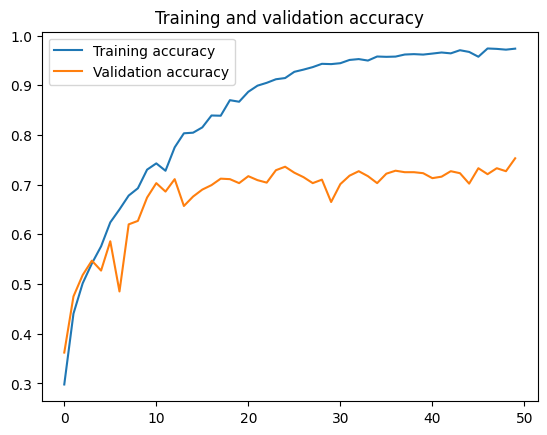

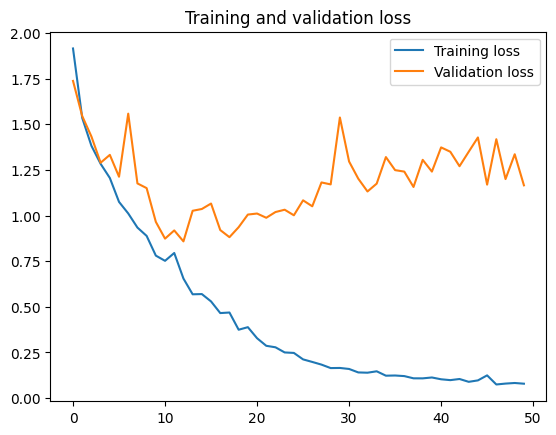

313/313 [==============================] - 3s 6ms/step - loss: 1.3124 - accuracy: 0.7319
Accuracy for test data :  0.7318999767303467
Loss for test data :  1.3124041557312012


In [30]:
run_model(model1_work, 50)

157/157 [==============================] - 1s 5ms/step


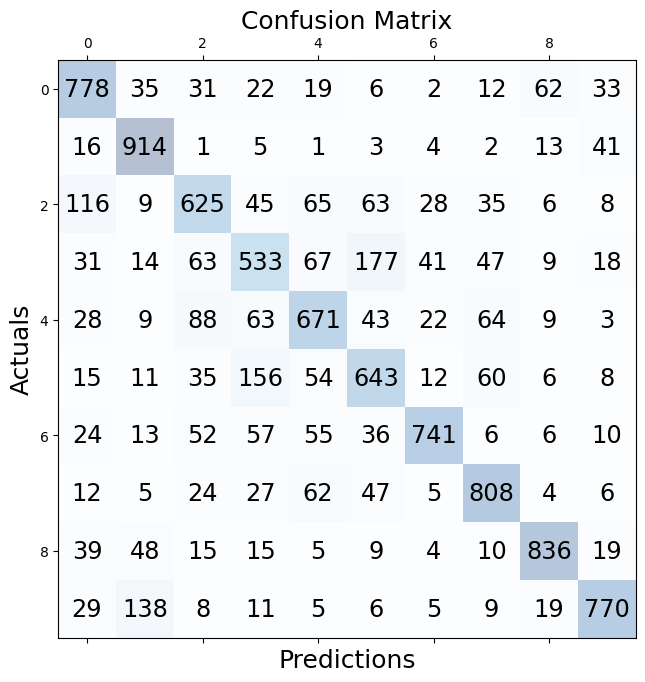

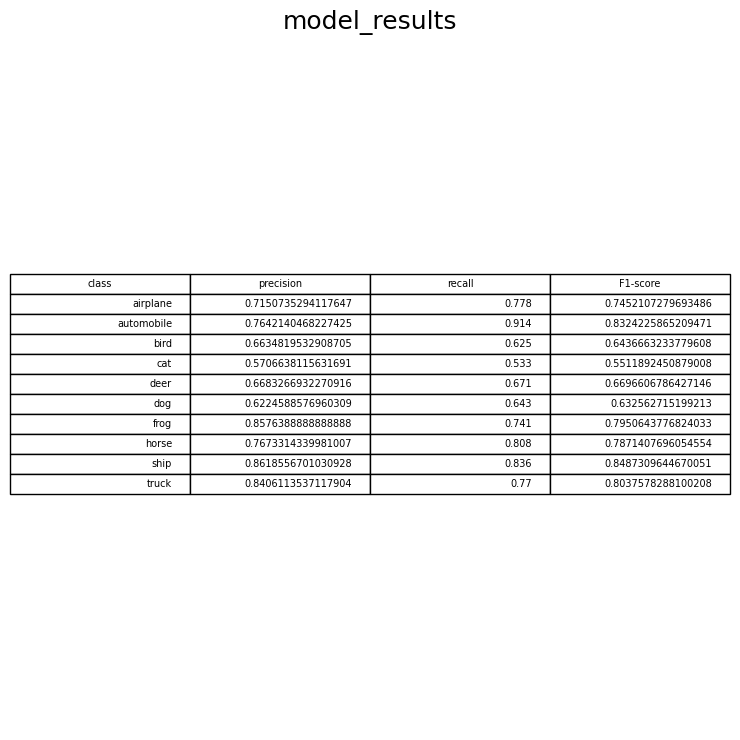

In [33]:
result_model(model1_work)

### LaNet

In [34]:
model2_work = ModelVisualization(model2, data)

Epoch 1/50
766/766 [==============================] - 6s 7ms/step - loss: 3.1153 - accuracy: 0.3021 - val_loss: 1.6980 - val_accuracy: 0.3980
Epoch 2/50
766/766 [==============================] - 5s 6ms/step - loss: 1.5566 - accuracy: 0.4530 - val_loss: 1.4823 - val_accuracy: 0.4580
Epoch 3/50
766/766 [==============================] - 4s 5ms/step - loss: 1.3943 - accuracy: 0.5176 - val_loss: 1.4031 - val_accuracy: 0.5430
Epoch 4/50
766/766 [==============================] - 4s 5ms/step - loss: 1.2964 - accuracy: 0.5554 - val_loss: 1.5184 - val_accuracy: 0.4860
Epoch 5/50
766/766 [==============================] - 4s 5ms/step - loss: 1.2302 - accuracy: 0.5826 - val_loss: 1.6364 - val_accuracy: 0.4960
Epoch 6/50
766/766 [==============================] - 4s 5ms/step - loss: 1.1777 - accuracy: 0.6053 - val_loss: 1.4200 - val_accuracy: 0.5370
Epoch 7/50
766/766 [==============================] - 4s 5ms/step - loss: 1.1288 - accuracy: 0.6235 - val_loss: 1.4433 - val_accuracy: 0.5810
Epoch 

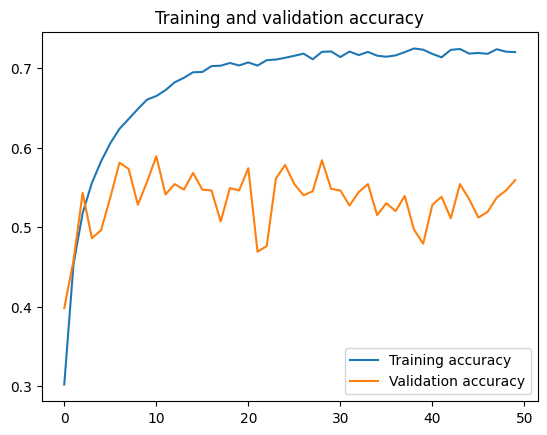

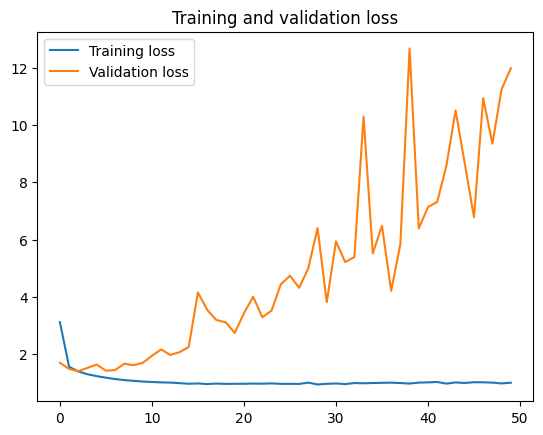

313/313 [==============================] - 1s 3ms/step - loss: 8.5589 - accuracy: 0.5520
Accuracy for test data :  0.5519999861717224
Loss for test data :  8.558908462524414


In [35]:
run_model(model2_work, 50)

157/157 [==============================] - 0s 2ms/step


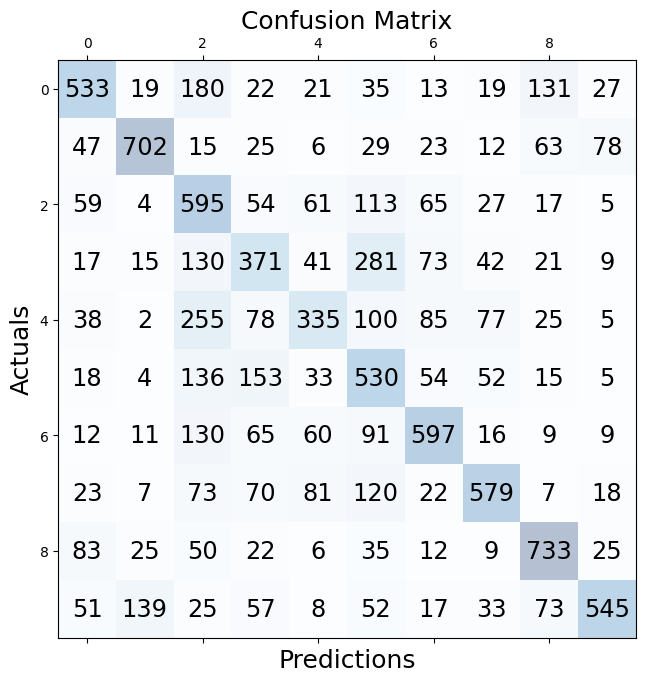

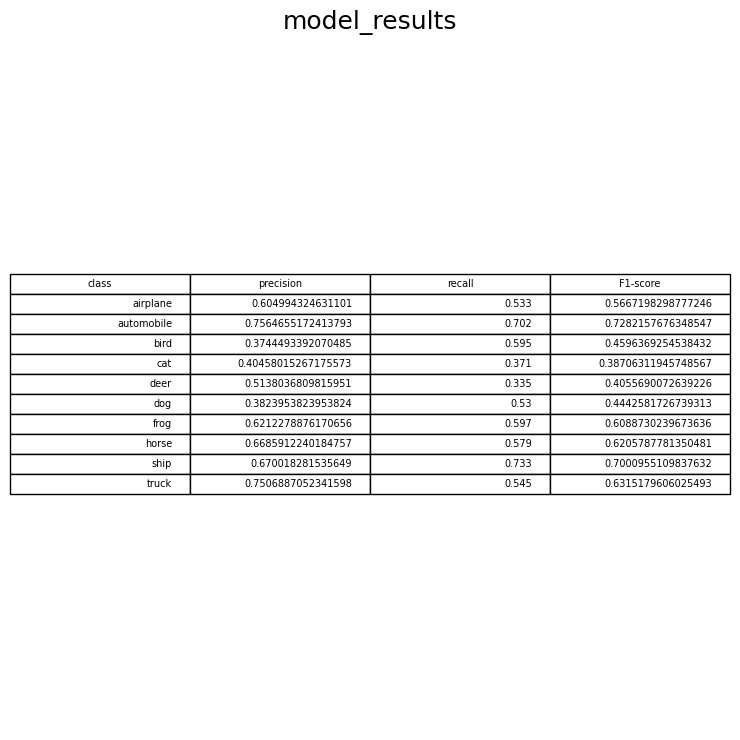

In [36]:
result_model(model2_work)